In [ ]:
!echo "deb http://downloads.skewed.de/apt bionic main" >> /etc/apt/sources.list
!apt-key adv --keyserver keys.openpgp.org --recv-key 612DEFB798507F25
!apt-get update
!apt-get install python3-graph-tool python3-cairo python3-matplotlib
import graph_tool as gt
from graph_tool.all import *
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Executing: /tmp/apt-key-gpghome.SLJ1bH1x4g/gpg.1.sh --keyserver keys.openpgp.org --recv-key 612DEFB798507F25
gpg: key 612DEFB798507F25: public key "Tiago de Paula Peixoto <tiago@skewed.de>" imported
gpg: Total number processed: 1
gpg:               imported: 1
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:3 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [40.1 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRe

In [ ]:
!ls '/content/drive/My Drive/Redes Complexas'


adjnoun.gml  lesmis.gml			    p2p-Gnutella04.txt	Trabalho1.ipynb
karate.gml   mixed.species_brain_1.graphml  power.gml


In [ ]:
path = '/content/drive/My Drive/Redes Complexas/'

In [ ]:
graphs = list()
graphs.append(graph_tool.load_graph(path+'karate.gml'))
graphs.append(graph_tool.load_graph(path+'mixed.species_brain_1.graphml'))
graphs.append(graph_tool.load_graph(path+'adjnoun.gml'))
graphs.append(graph_tool.load_graph(path+'lesmis.gml'))

In [ ]:
for G in graphs:
  print(G)

<Graph object, undirected, with 34 vertices and 78 edges, at 0x7f7d54ca4390>
<Graph object, directed, with 65 vertices and 1139 edges, 1 internal vertex property, 1 internal edge property, 4 internal graph properties, at 0x7f7d54ca4358>
<Graph object, undirected, with 112 vertices and 425 edges, 2 internal vertex properties, at 0x7f7d54ca4630>
<Graph object, undirected, with 77 vertices and 254 edges, 1 internal vertex property, 1 internal edge property, at 0x7f7d54ca47b8>


In [ ]:
def get_CCDF(metrics):
  total = len(metrics)
  relative_frequencies = dict()
  for i in metrics:
    if i in relative_frequencies:
      relative_frequencies[i] += 1/total
    else:
      relative_frequencies[i] = 1/total
  x = list()
  y = list()
  degrees = sorted(list(relative_frequencies.keys()))
  for k in degrees:
    fraction_up_to_K = 0
    for j in relative_frequencies.keys():
        if j < k:
          fraction_up_to_K += relative_frequencies[j]
    x.append(k)
    y.append(1 - fraction_up_to_K)
  return x,y

In [ ]:
def get_distance(G):
  #lengths = dict()
  lengths = list()
  #retorna um dicionário onde a chave é a distância e o valor quantas vezes 
  #ela se repete no grafo
  if G.is_directed():
    for u in G.get_vertices():
      for v in G.get_vertices():
        if v>u:
          dist = gt.topology.shortest_distance(G,u,v)
          if dist < len(G.get_vertices()):
            lengths.append(dist)
  else:
    for u in G.get_vertices():
      for v in G.get_vertices():
        if v>u:
          dist = gt.topology.shortest_distance(G,u,v)
          if dist < len(G.get_vertices()):
            lengths.append(dist)
  return lengths

In [ ]:
def ecdf2(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

In [ ]:
def get_connected_components(G):
  # label the components in a property map
  c = label_components(G)[0]
  cc = list()
  total_components = int(np.max(c.get_array())) + 1
  for i in range(total_components):
    u = GraphView(G, vfilt=c.a == i)
    cc.append(len(u.get_vertices()))
  return cc



In [ ]:
def get_betweenness(G):
  c = betweenness(G)
  if type(c) is tuple:
    c = c[0]
  return np.array(c.get_array())

In [ ]:
def get_closeness(G):
  c = closeness(G)
  if type(c) is tuple:
    c = c[0]
  return np.array(c.get_array())

In [ ]:
def get_metrics(G):
  metrics = dict()
  metrics['degree'] =  G.get_out_degrees(G.get_vertices())
  metrics['distance'] = get_distance(G)
  metrics['tam_CC'] = get_connected_components(G)
  metrics['betweenness'] = get_betweenness(G)
  metrics['closeness'] = get_closeness(G)
  return metrics

In [ ]:
c = betweenness(graphs[0])
c

(<VertexPropertyMap object with value type 'double', for Graph 0x7f7d54ca4390, at 0x7f7d5d738390>,
 <EdgePropertyMap object with value type 'double', for Graph 0x7f7d54ca4390, at 0x7f7d5d738400>)

In [ ]:
type(c) is tuple

True

In [ ]:
graphs_metrics = list()
for G in graphs:
  graphs_metrics.append(get_metrics(G))

In [ ]:
data = [      ['mean',0,0,0],
              ['median',0,1,0]
        ]

In [ ]:
#g = graph_tool.load_graph_from_csv(path+'p2p-Gnutella04.txt',directed=True,csv_options={'delimiter':'\t'})
df = pd.DataFrame(data,columns=['id','degree','distance','tam_cc'])
df.set_index('id')
df

,id,degree,distance,tam_cc
0,mean,0,0,0
1,median,0,1,0


In [ ]:
graphs_metrics[0].keys()
def display_metrics_stats(metric_dict):
  metrics_matrix = list()
  stats = {'mean':np.mean,'std':np.std,'median':np.median,'min':np.min,'max':np.max}
  for stat in stats.keys():
    row = list()
    row.append(stat)
    for metric in metric_dict.keys():
      row.append(stats[stat](metric_dict[metric]))
    metrics_matrix.append(row)
  df = pd.DataFrame(metrics_matrix,columns=['id','degree','distance','tam_cc','betweenness','closeness'])
  df.set_index('id')
  return df

In [ ]:
get_CCDF(graphs_metrics[1]['closeness'])

([0.3575418994413408,
  0.40764331210191085,
  0.4129032258064516,
  0.4155844155844156,
  0.423841059602649,
  0.42953020134228187,
  0.4383561643835616,
  0.4413793103448276,
  0.4507042253521127,
  0.46715328467153283,
  0.47058823529411764,
  0.48484848484848486,
  0.49230769230769234,
  0.49612403100775193,
  0.5,
  0.512,
  0.5161290322580645,
  0.5203252032520326,
  0.5245901639344263,
  0.5333333333333333,
  0.5378151260504201,
  0.5423728813559322,
  0.5470085470085471,
  0.5565217391304348,
  0.5614035087719298,
  0.5714285714285714,
  0.5765765765765766,
  0.5818181818181818,
  0.5871559633027523,
  0.6037735849056604,
  0.6095238095238096,
  0.6213592233009708,
  0.6274509803921569,
  0.64,
  0.6530612244897959,
  0.6597938144329897,
  0.6666666666666666,
  0.6881720430107527,
  0.6956521739130435,
  0.7619047619047619],
 [1,
  0.9846153846153847,
  0.9692307692307692,
  0.9384615384615385,
  0.9230769230769231,
  0.9076923076923077,
  0.8923076923076922,
  0.87692307692307

In [ ]:
graph_names = ['karate','cat connectome','word ajacency','les miserables']
for graph in range(len(graphs_metrics)):
  spacing = '=================================================================='
  head = '=================== '+graph_names[graph]+' '
  print(head+(len(spacing) - len(head))*'=')
  print(display_metrics_stats(graphs_metrics[graph]))
  print(spacing)

=================== karate =======================================
       id     degree  distance  tam_cc  betweenness  closeness
0    mean   4.588235    2.4082    34.0     0.044006   0.426480
1     std   3.820361    0.9303     0.0     0.092543   0.071024
2  median   3.000000    2.0000    34.0     0.002566   0.383721
3     min   1.000000    1.0000    34.0     0.000000   0.284483
4     max  17.000000    5.0000    34.0     0.437635   0.568966
=================== cat connectome ===============================
       id     degree  distance  tam_cc  betweenness  closeness
0    mean  17.523077  1.896635    65.0     0.013687   0.550359
1     std   9.888778  0.640304     0.0     0.019324   0.084236
2  median  16.000000  2.000000    65.0     0.006311   0.547009
3     min   2.000000  1.000000    65.0     0.000000   0.357542
4     max  44.000000  4.000000    65.0     0.092542   0.761905
=================== word ajacency ================================
       id     degree  distance  tam_cc  bet

In [ ]:
xlabels = ['degree','distance','betweenness','closeness']
ylabels = ['Fração vértices de grau >= K','Fração caminhos de tamanho >= K','Fração vértices de betweenness >= K','Fração vértices de closenness >= K']
titles = ['CCDF_distribuicao_grau','CCDF_distribuicao_distancia','CCDF_distribuicao_betweenness','CCDF_distribuicao_closeness']

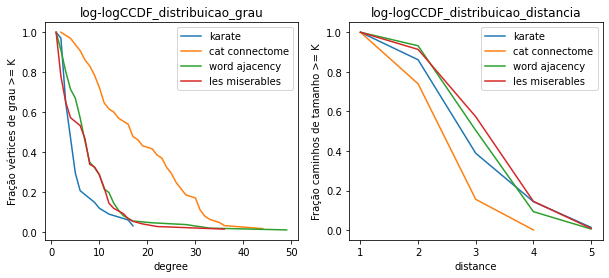

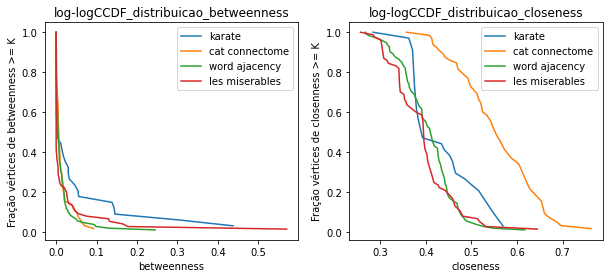

In [ ]:
for i in range(len(xlabels)):
  if i%2 == 0:
    fig, axs = plt.subplots(1, 2)
    fig.set_size_inches(10,4)
  for j in range(len(graph_names)):
    x,y = get_CCDF(graphs_metrics[j][xlabels[i]])
    axs[i%2].plot(x,y)
  axs[i%2].legend(graph_names)
  axs[i%2].set(xlabel = xlabels[i],ylabel=ylabels[i])
  axs[i%2].set_title('log-log'+titles[i])
  if i%2 == 1:
    plt.savefig('log-log'+titles[i]+titles[i-1]+'.png')
    plt.show()

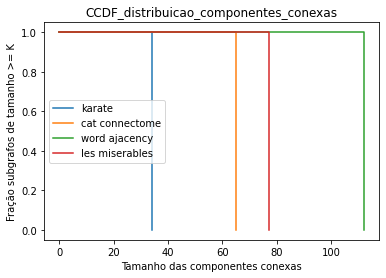

In [ ]:
for gm in graphs_metrics:
  x,y = get_CCDF(gm['tam_CC'])
  y[0] = 0
  x.extend([0])
  y.extend([1])
  plt.step(x,y)
plt.legend(graph_names)
plt.xlabel('Tamanho das componentes conexas')
plt.ylabel('Fração subgrafos de tamanho >= K')
plt.title('CCDF_distribuicao_componentes_conexas')
#plt.savefig(titles[i]+'.png')
plt.savefig('tam_CC.png')
plt.show()